# 신경망 학습

학습이란, 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 이번장에서는 신경망이 학습할 수 있도록 해주는 지표인 손실함수를 소개한다. 이 손실함수의 값이 가장 작게 만드는 매개변수를 찾는 걸 목표로 하고, 경사하강법을 소개한다.

# 손실함수

신경망도 하나의 지표를 기준으로 최적의 매개변수 값을 탐색합니다. 신경망 학습에서 사용하는 지표는 손실함수라고 합니다. 이 손실 함수는 임의의 함수를 사용할 수도 있지만, 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용합니다. 

즉 손실함수는 신경망 성능의 나쁨을 나타내는 지표로, 현재의 신경망이 훈련데이터를 얼마나 잘 처리하지 못하는냐를 나타냅니다. 

#4.1 오차제곱합.

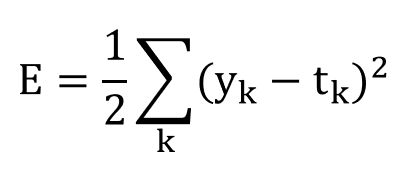

y는 신경망의 값이고, t는 정답 레이블, k는 원소의 갯수를 의미합니다. 

소프트 맥스 함수의 출력 = 출력층에서 사용하는 활성함수

오차제곱합은 출력값과 정답레이블의 차를 제곱하고, 그 총합을 구한 것 이다.

In [ ]:
import numpy as np

In [ ]:
def sum_square_error(y,t):
  return 0.5 * np.sum((y-t)**2)
  

In [ ]:
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1,0.05,0.1,0.6,0.0,0.05,0.1,0.0,0.1,0.0]

In [ ]:
sum_square_error(np.array(y),np.array(t))

0.6024999999999999

In [ ]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.1,0.0]

In [ ]:
sum_square_error(np.array(y),np.array(t))

0.6025

즉 오차제곱합 기준으로는 첫 번째 추정 결과가 정답에 더 가까울 것으로 판단할 수 있습니다.

#4.2 교차 엔트로피 오차

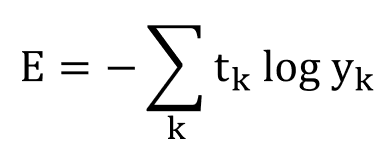

y는 신경망의 출력, t는 정답 레이블입니다. t는 정답에 해당하는 인덱스의 원소만 1이고, 나머지는 0입니다.

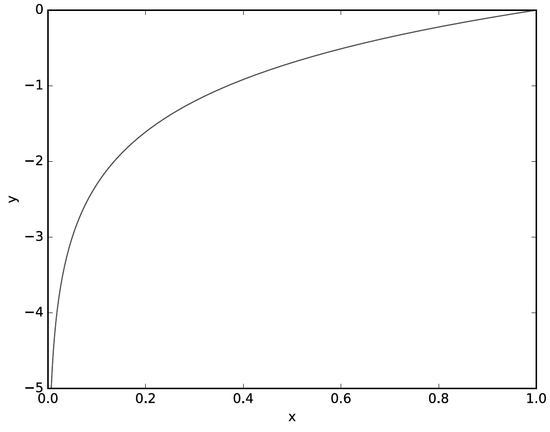

위 그래프는 교차 엔트로피처럼 로그 함수를 구현 한 것입니다. 이 그림에서 보듯, x가 1일때, y는 0이 되고, x가 0에 가까워질수록, y의 값은 점점 작아집니다. 위 그래프도 마찬가지로, 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일때, 0이 됩니다. 반대로 정답일때의 출력이 작아질수록 오차는 커집니다.

In [ ]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y*delta))
  

## 4.3미니배치 학습

기계학습 문제는 훈련데이터를 사용해서 학습한다. 더 구체적으로 말하자면, 훈련데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아냅니다. 이렇게 하려면 모든 훈련데이터를 대상으로 손실함수를 구해야 한다. 

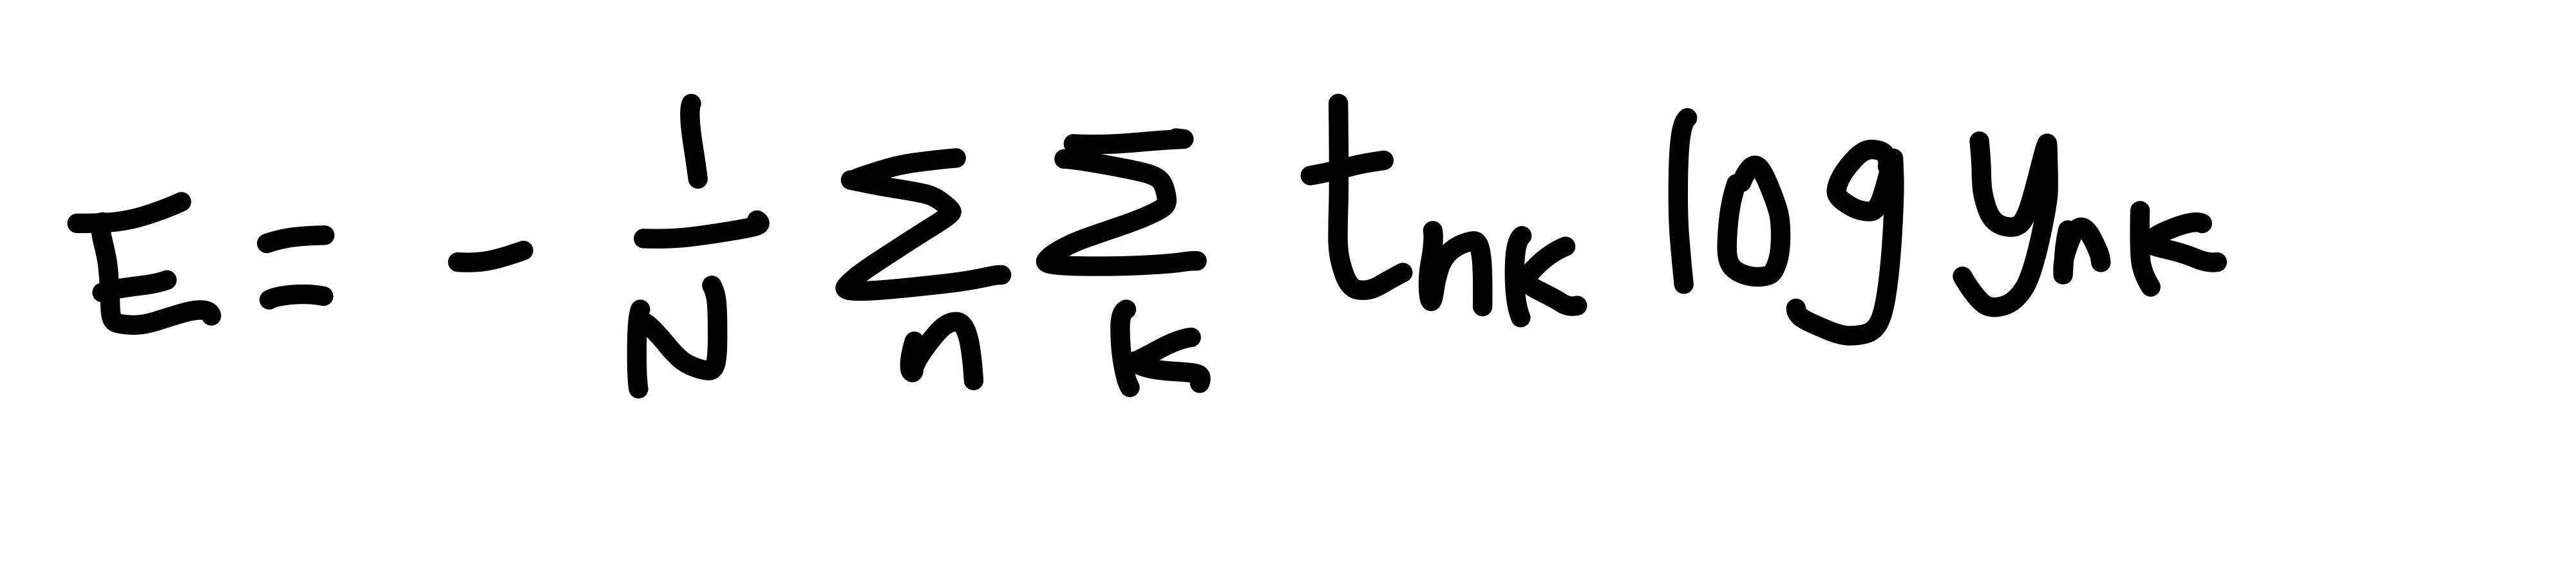

수식은 기존의 교차엔트로피를 하나의 데이터에서 n개의 데이터로 확장한 수식이다. 마지막에 n으로 나누어 정규화를 시키면서, 손실함수의 평균을 구한다.

하지만 빅데이터의 경우 매우 많은 데이터가 존재한다. 따라서 일부를 추려서 근사치를 이용한다. 이 일부를 미니배치라고 하고, 이 학습을 미니배치학습이라고 한다.

##4.4 왜 손실함수를 설정하는가?

정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문입니다. 

그리고 정확도를 지표로 삼을 경우, 매개변수를 약간만 조정해서는 정확도가 개선되지 않고, 일정하게 유지됩니다. 혹, 정확도가 개선된다고 하더라도, 그 값은 32.0123%와 같은 연속적인 변화보다는 33%나 34%처럼 불연속적인 띄엄띄엄한 값으로 바뀌어버립니다. 

하지만 손실함수의 경우, 값이 조금 변하면, 그에 반응하여, 손실 함수의 값도 0.93432처럼 연속적으로 변화하는 것입니다.

#4.5 수치미분

수치미분이란 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.

진정한 미분과 수치미분은 수치미분에 오차가 포함되기 때문에, 완전히 일치하지 않는다.



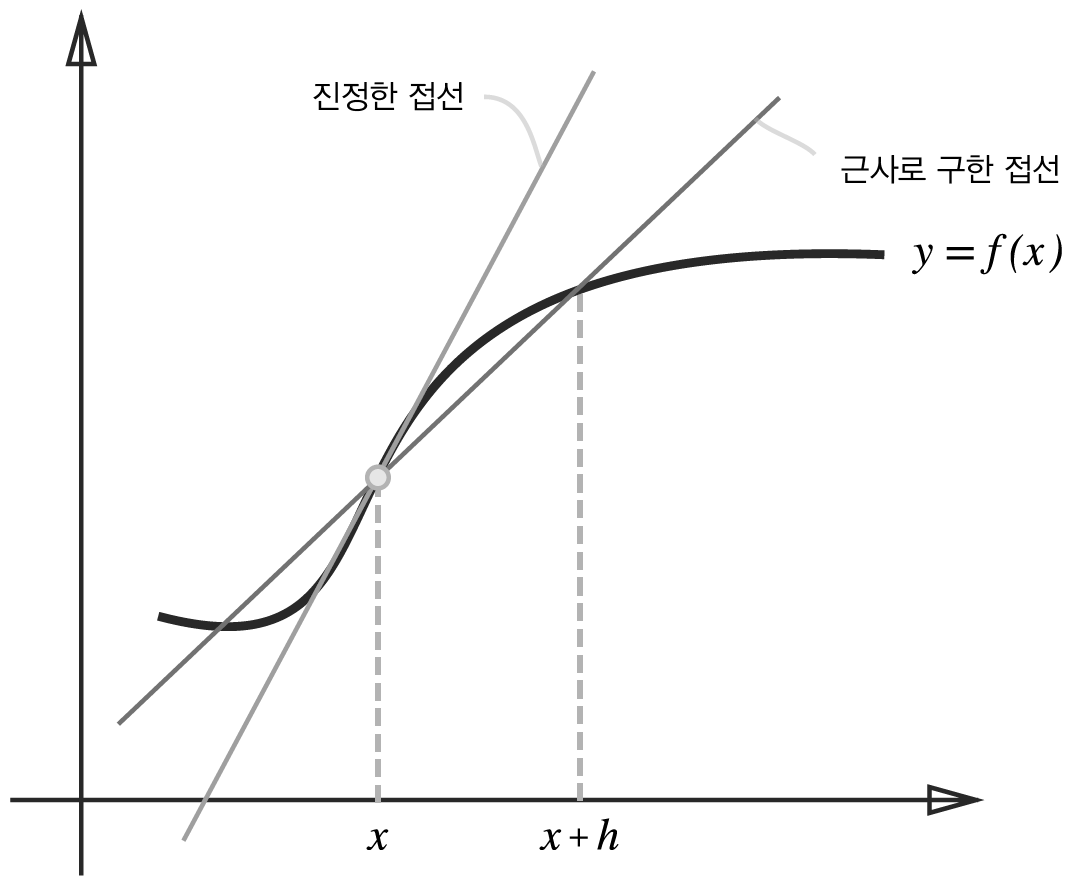

#4.6 기울기


In [ ]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2

## 4.6.1 경사하강법


최적이란 손실 함수가 최솟값이 될 때의 매개변수 값입니다. 그러나 일반적인 문제의 손실 함수가 최솟값이 될 때의 매개변수 값입니다. 여기서 최적이란 손실함수가 최솟값이 될 때의 매개변수 값입니다. 그러나 일반적인 문제의 손실 함수는 매우 복잡합니다. 따라서 매개변수 공간이 광대해서 어디가 최솟값인지 짐작하기 어렵습니다. 이럴때 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법입니다.

기울어진 방향이 꼭 최솟값을 가리키는 것은 아니지만, 그 방향으로 가야 함수의 값을 줄일 수 있다. 그래고 우리는 이제 나아갈 방향을 정해야 한다.

In [ ]:
numerical_gradient(function_2, np.array([0.0,2.0]))

array([0., 4.])

In [ ]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad
  return x

인수 f는 최적화 하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수를 뜻합니다. 함수의 기울기는 numerical_gradient(f,x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복한다.

In [ ]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x, lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

#4.7 학습알고리즘 구현하기

## 4.7.1신경망의 절차

전제: 딥러닝이란 가중치와 편향을 조절하는 과정

1단계- 미니배치:

훈련 데이터 중 일부를 무작위로 가져온다. 아렇게 선별된 데이터를 미니배치라 하며, 그 미니 배치의 손실함수 값을 줄이는 것이 목표입니다.

2단계 - 기울기 산출:

미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실함수의 값을 매우 작게 하는 방향을 제시합니다.

3단계 - 매개변수 갱신

가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.

4단계 - 반복



## 4.7.2 미니배치 학습 구현

미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱산하는 것.

이후 학습을 진행하고, 손실함수의 값이 점점 줄어 든다면, 학습이 잘되고 있다는 의미